<a href="https://colab.research.google.com/github/sjkim-audio/audio-dsp-lab/blob/main/notebooks/02_Audio_Filtering_and_Noise_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

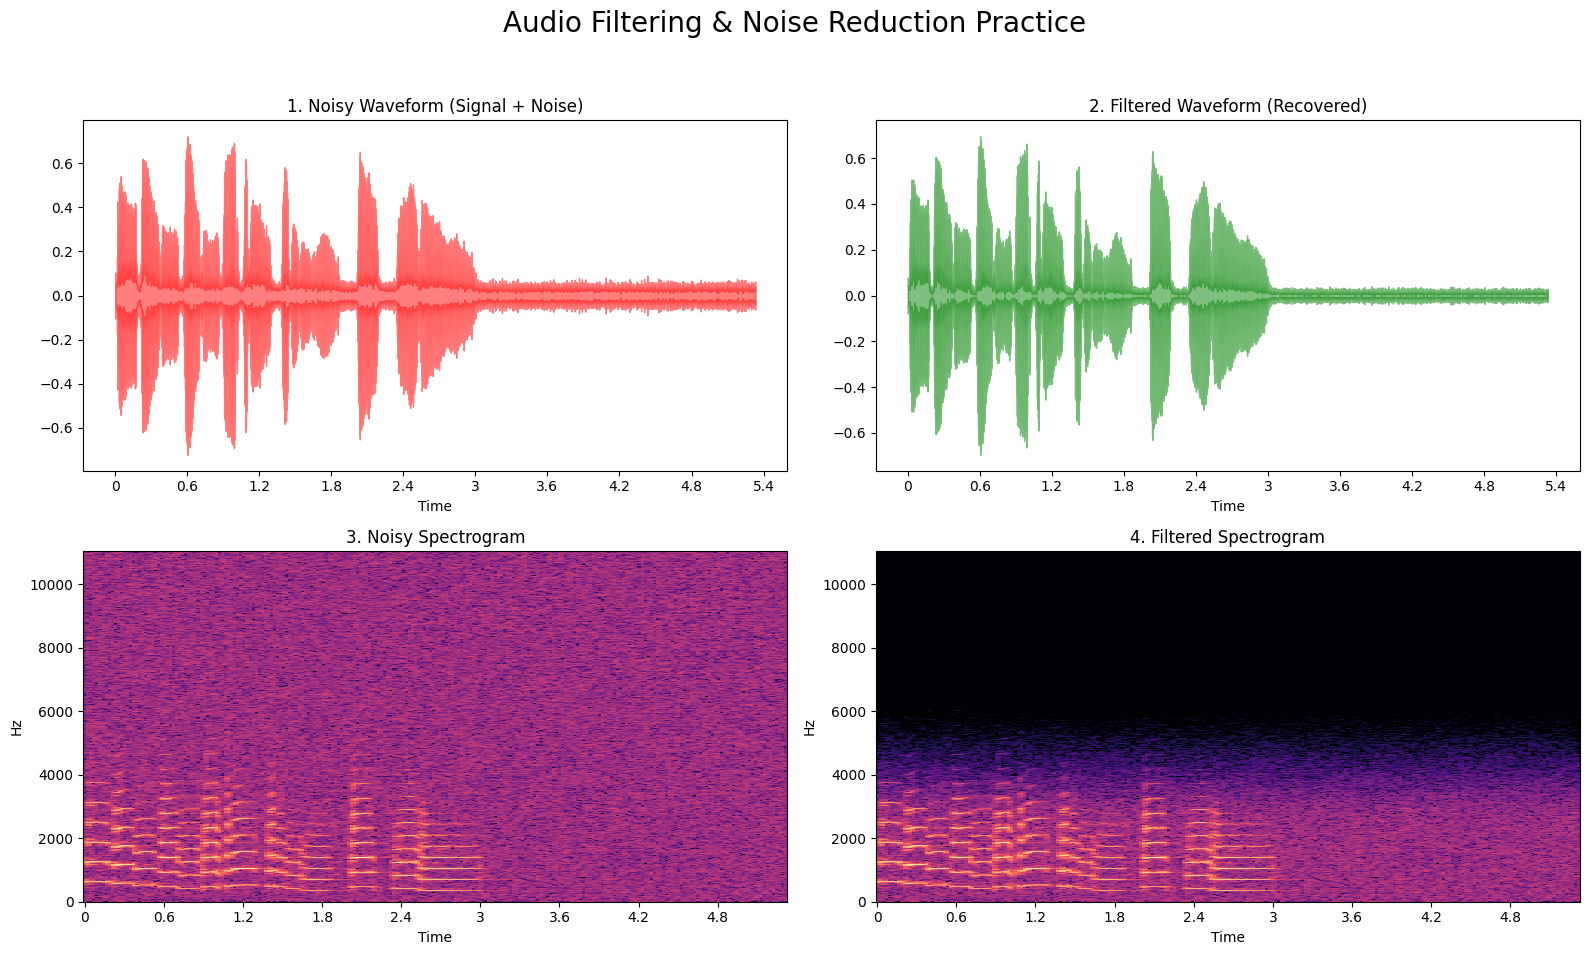

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# 1. 원본 데이터 로드
y, sr = librosa.load(librosa.ex('trumpet'))

# 2. 인위적인 화이트 노이즈 생성 및 추가
# 이유: 필터의 성능을 시각적/청각적으로 확인하기 위해 노이즈를 강제로 추가.
noise = np.random.normal(0, 0.02, len(y))
y_noise = y + noise

# 3. Butterworth Low-pass Filter 설계
# 이유: 고주파 성분인 노이즈를 차단하고 저주파인 악기 소리만 통과.
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # 나이퀴스트 주파수
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y_filtered = lfilter(b, a, data)
    return y_filtered

# 차단 주파수(Cutoff)를 3000Hz로 설정하여 필터 적용
cutoff_freq = 3000
y_recovered = butter_lowpass_filter(y_noise, cutoff_freq, sr)


# 4. 결과 시각화 비교 (2행 2열 대시보드)
plt.figure(figsize=(16, 10))
plt.suptitle('Audio Filtering & Noise Reduction Practice', fontsize=20)

# (1) 노이즈가 섞인 신호 파형
plt.subplot(2, 2, 1)
librosa.display.waveshow(y_noise, sr=sr, color='r', alpha=0.5)
plt.title('1. Noisy Waveform (Signal + Noise)')

# (2) 필터로 복구된 신호 파형
plt.subplot(2, 2, 2)
librosa.display.waveshow(y_recovered, sr=sr, color='g', alpha=0.5)
plt.title('2. Filtered Waveform (Recovered)')

# (3) 노이즈 섞인 신호의 스펙트로그램
plt.subplot(2, 2, 3)
D_noise = librosa.amplitude_to_db(np.abs(librosa.stft(y_noise)), ref=np.max)
librosa.display.specshow(D_noise, sr=sr, x_axis='time', y_axis='hz')
plt.title('3. Noisy Spectrogram')

# (4) 필터 적용 후 스펙트로그램 (고주파가 깎인 것을 확인 가능)
plt.subplot(2, 2, 4)
D_recovered = librosa.amplitude_to_db(np.abs(librosa.stft(y_recovered)), ref=np.max)
librosa.display.specshow(D_recovered, sr=sr, x_axis='time', y_axis='hz')
plt.title('4. Filtered Spectrogram')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()